The cell below holds some of the needed imports throughout the project.

In [5]:
!pip3 install nltk

import nltk
import pandas as pd
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.tokenize import sent_tokenize
from nltk.wsd import lesk
import string
import glob
from textblob import TextBlob
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re
from math import sqrt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve,classification_report,confusion_matrix,precision_recall_curve,auc,mean_squared_error
import contractions


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tunceratac/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tunceratac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tunceratac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tunceratac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tunceratac/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/tunceratac/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/t

Some methods to be used for preprocessing:

In [6]:
#basic tag recognizer

import nltk
from nltk.corpus import wordnet as wordnet

def get_wordnet_pos(treebank_tag):
    
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

In [7]:
#preprocessing method:

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

CLEAN_PATTERN = r'[^a-zA-z\s]'

def clean(word):
    return re.sub(CLEAN_PATTERN, '', word)

def preprocessor(string_toprocess):
    data = [string_toprocess]
    temp_line = ""
    lower_line= ""
    words = word_tokenize(string_toprocess)
    for word in words:
        lower_line= lower_line+" "+clean(word)
    
    words = word_tokenize(string_toprocess)
    corrected_line = ""
    for word in words:
        if word not in string.punctuation:
            word_temp = TextBlob(word)
            word_corrected = str(word_temp.correct())
            corrected_line = corrected_line+" "+word_corrected
        else:
            word = ""
            corrected_line = corrected_line + word 
      
    temp_line = corrected_line
#Step 2: Removing Stop Words 

    words =word_tokenize(temp_line)
    swr_line = ""
    stop_words = stopwords.words('English')
    for word in words:
        if word in stop_words:
            word_evaluated = ""
        else:
            word_evaluated = word
        swr_line = swr_line+" "+word_evaluated
                
    temp_line = swr_line
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_line = ""
    words = nltk.pos_tag(word_tokenize(temp_line))
    
    for word, tag in words:
        wntag = get_wordnet_pos(tag)
        if wntag == "":
            lemmatized_line = lemmatized_line+" "+word
            
        else:
            lemmatized_line = lemmatized_line+" "+lemmatizer.lemmatize(word, wntag)
  
    temp_line = lemmatized_line    
        
    data.append(temp_line)
    return data

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tunceratac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tunceratac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#reading, preprocessing and combining data:

import glob
import nltk
nltk.download('wordnet')
import csv
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

files_neg = [file for file in glob.glob("neg/*")]
files_pos = [file for file in glob.glob("pos/*")]

with open("dataset.csv", "w", encoding="UTF8", newline="") as output:
    
    writer = csv.writer(output)
    count = 1
    
    for file_name in files_neg:
        with open(file_name, 'r') as input:
            for line in input:
                lines = preprocessor(line)
                row = [count, "0", lines[0], lines[1] ]
                writer.writerow(row)
                count += 1
                
    for file_name in files_pos:
        with open(file_name, 'r') as input:
            for line in input:
                lines = preprocessor(line)
                row = [count, "1", lines[0], lines[1] ]
                writer.writerow(row)
                count += 1

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tunceratac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tunceratac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# B1: Extracting Features

In [9]:
import pandas as pd
df = pd.read_csv('dataset.csv', header = None)
df.to_csv("dataset.csv",header=["Line Number","Polarity(neg:0,pos:1)", "data", "cleaned_data"],index=False)
df = pd.read_csv("dataset.csv")
df.head()

,Line Number,"Polarity(neg:0,pos:1)",data,cleaned_data
0,1,0,bad . bad . \n,bad bad
1,2,0,bad . \n,bad
2,3,0,that one word seems to pretty much sums up bey...,one word seem pretty much sum beyond valley doll
3,4,0,"if that summary isn't enough for you , how abo...",summary n't enough
4,5,0,still haven't got the point ? \n,still n't get point


In [10]:
#number of words:
df['number_of_words'] = df['cleaned_data'].apply(lambda x : len(TextBlob(str(x)).words))
df['number_of_words']

0         2
1         1
2         9
3         3
4         4
         ..
64715     6
64716     7
64717     8
64718     7
64719    12
Name: number_of_words, Length: 64720, dtype: int64

In [11]:
#number of "wh" words:
wh_words = set(['why', 'who', 'which', 'what', 'where', 'when', 'how'])
df['is_wh_words_present'] = df['cleaned_data'].apply(lambda x : True if \
                                             len(set(TextBlob(str(x)).
words).intersection(wh_words))>0 else False)
df['is_wh_words_present']

0        False
1        False
2        False
3        False
4        False
         ...  
64715    False
64716    False
64717    False
64718    False
64719    False
Name: is_wh_words_present, Length: 64720, dtype: bool

In [12]:
#sentiment scores:
df['polarity'] = df['cleaned_data'].apply(lambda x : TextBlob(str(x)).sentiment.
polarity)
df['polarity']


0       -0.700000
1       -0.700000
2        0.225000
3        0.000000
4        0.000000
           ...   
64715   -0.187500
64716   -0.166667
64717    0.144444
64718    0.000000
64719    0.000000
Name: polarity, Length: 64720, dtype: float64

In [13]:
df['polarityNorP'] = df['cleaned_data'].apply(lambda x : 1 if \
                                             (TextBlob(str(x)).sentiment.polarity)>0.5 else 0)
df['polarityNorP']

0        0
1        0
2        0
3        0
4        0
        ..
64715    0
64716    0
64717    0
64718    0
64719    0
Name: polarityNorP, Length: 64720, dtype: int64

In [14]:
#subjectivity scores:

df['subjectivity'] = df['cleaned_data'].apply(lambda x : TextBlob(str(x)).
sentiment.subjectivity)
df['subjectivity']

0        0.666667
1        0.666667
2        0.600000
3        0.500000
4        0.000000
           ...   
64715    0.500000
64716    0.433333
64717    0.411111
64718    0.000000
64719    0.000000
Name: subjectivity, Length: 64720, dtype: float64

In [15]:
# Fill NaN Values
df.fillna('', inplace=True)

# Bag of Words

In [16]:
bag_of_words_model = CountVectorizer(max_features= 10)
bag_of_word_df = pd.DataFrame(bag_of_words_model.fit_transform(df['cleaned_data']).todense())
bag_of_word_df.columns = sorted(bag_of_words_model.vocabulary_)
bag_of_word_df.head()

,character,film,get,go,like,make,movie,one,see,time
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


# Term Frequency-Inverse Document Frequency

In [17]:
tfidf_model = TfidfVectorizer(max_features=10)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(df['cleaned_data']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,character,film,get,go,like,make,movie,one,see,time
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Word Cloud

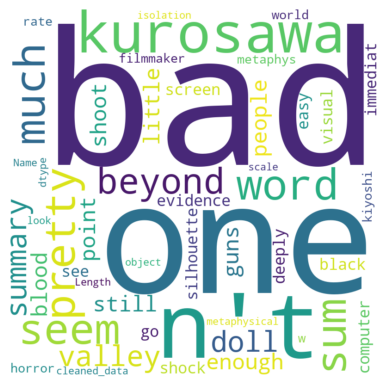

In [18]:
from wordcloud import WordCloud, STOPWORDS
cleaned_text = df["cleaned_data"]
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words=50,
                min_font_size = 10).generate(str(cleaned_text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Text Classifiers

In [19]:
# Split Train and Test Set
tfidf_model = TfidfVectorizer(max_features=10)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(df['cleaned_data']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
df['polarityNorP'] = df['cleaned_data'].apply(lambda x : 1 if \
                                             (TextBlob(str(x)).sentiment.polarity)>0.5 else 0)
X_train, X_valid, y_train, y_valid = train_test_split(tfidf_df, df["polarityNorP"], \
                                                      test_size=0.2, random_state=42,stratify = df["polarityNorP"])

In [20]:
def clf_model(model_type, X_train, y_train, X_valid):
    model = model_type.fit(X_train,y_train)
    predicted_labels = model.predict(X_valid)
    predicted_probab = model.predict_proba(X_valid)[:,1]
    return [predicted_labels,predicted_probab, model]

In [22]:
def model_evaluation(actual_values, predicted_values, predicted_probabilities):
    cfn_mat = confusion_matrix(actual_values,predicted_values)
    print("confusion matrix: \n",cfn_mat)
    print("\naccuracy: ",accuracy_score(actual_values,predicted_values))
    print("\nclassification report: \n", classification_report(actual_values,predicted_values))
    fpr,tpr,threshold=roc_curve(actual_values, predicted_probabilities)
    print ('\nArea under ROC curve for validation set:', auc(fpr,tpr))
    rms = sqrt(mean_squared_error(actual_values, predicted_values))
    print('Root Mean Squared Error (RMSE) is:', rms)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(fpr,tpr,label='Validation set AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    ax.legend(loc='best')
    plt.show()

# Logistic Regression

confusion matrix: 
 [[12203     0]
 [  741     0]]

accuracy:  0.9427533992583437

classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     12203
           1       0.00      0.00      0.00       741

    accuracy                           0.94     12944
   macro avg       0.47      0.50      0.49     12944
weighted avg       0.89      0.94      0.91     12944


Area under ROC curve for validation set: 0.5403165722284834
Root Mean Squared Error (RMSE) is: 0.2392626187720438


/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


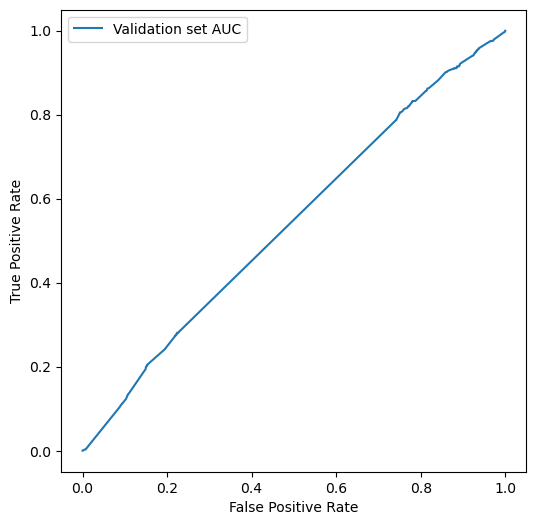

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
results = clf_model(logreg, X_train, y_train, X_valid)
model_evaluation(y_valid, results[0], results[1])

# Naive Bayes

confusion matrix: 
 [[12203     0]
 [  741     0]]

accuracy:  0.9427533992583437

classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     12203
           1       0.00      0.00      0.00       741

    accuracy                           0.94     12944
   macro avg       0.47      0.50      0.49     12944
weighted avg       0.89      0.94      0.91     12944


Area under ROC curve for validation set: 0.5414065455685939
Root Mean Squared Error (RMSE) is: 0.2392626187720438


/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


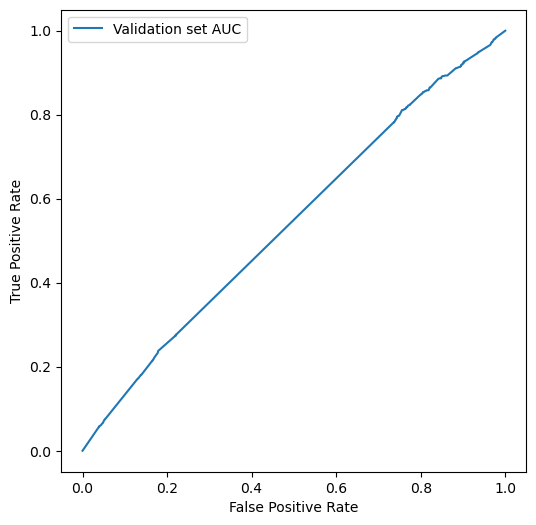

In [24]:

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
results = clf_model(nb, X_train, y_train, X_valid)
model_evaluation(y_valid, results[0], results[1])

# K-Nearest Neighbour

/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


confusion matrix: 
 [[12188    15]
 [  741     0]]

accuracy:  0.9415945611866502

classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     12203
           1       0.00      0.00      0.00       741

    accuracy                           0.94     12944
   macro avg       0.47      0.50      0.48     12944
weighted avg       0.89      0.94      0.91     12944


Area under ROC curve for validation set: 0.49842437143230295
Root Mean Squared Error (RMSE) is: 0.24167217219479328


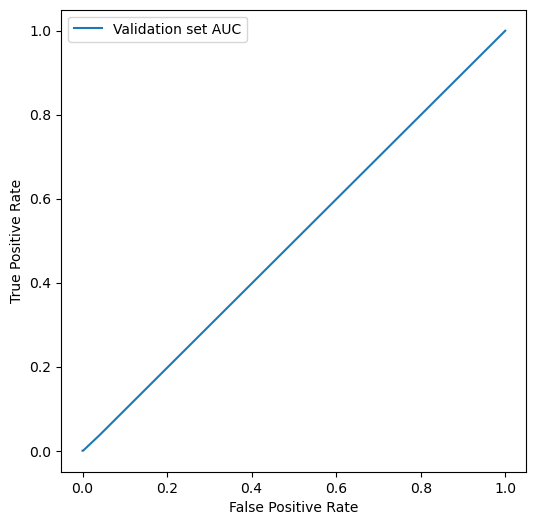

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
results = clf_model(knn, X_train, y_train, X_valid)
model_evaluation(y_valid, results[0], results[1])

# Random Forest

confusion matrix: 
 [[12203     0]
 [  741     0]]

accuracy:  0.9427533992583437

classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     12203
           1       0.00      0.00      0.00       741

    accuracy                           0.94     12944
   macro avg       0.47      0.50      0.49     12944
weighted avg       0.89      0.94      0.91     12944


Area under ROC curve for validation set: 0.5342986055839237
Root Mean Squared Error (RMSE) is: 0.2392626187720438


/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


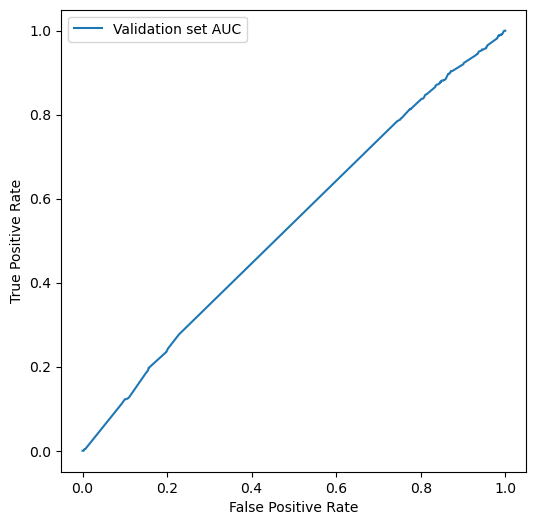

In [26]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=20,max_depth=4,max_features='sqrt',random_state=1)
results = clf_model(rfc, X_train, y_train, X_valid)
model_evaluation(y_valid, results[0], results[1])
model_rfc = results[2]

# XG-Boost

confusion matrix: 
 [[12203     0]
 [  741     0]]

accuracy:  0.9427533992583437

classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     12203
           1       0.00      0.00      0.00       741

    accuracy                           0.94     12944
   macro avg       0.47      0.50      0.49     12944
weighted avg       0.89      0.94      0.91     12944


Area under ROC curve for validation set: 0.5
Root Mean Squared Error (RMSE) is: 0.2392626187720438


/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


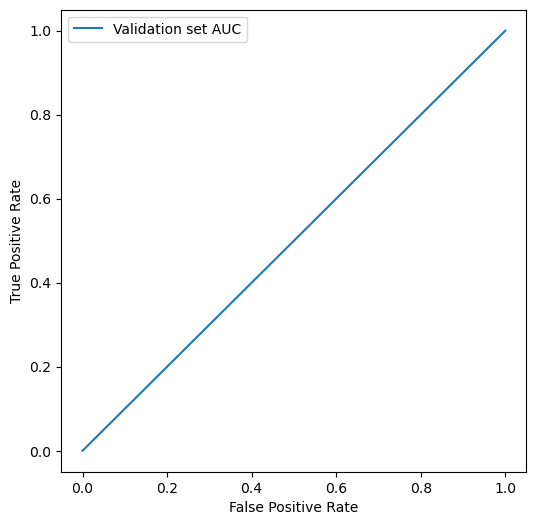

In [27]:
from xgboost import XGBClassifier
xgb_clf=XGBClassifier(n_estimators=20,learning_rate=0.03,max_depth=5,subsample=0.6,colsample_bytree= 0.6,reg_alpha= 10,seed=42)
results = clf_model(xgb_clf, X_train, y_train, X_valid)
model_evaluation(y_valid, results[0], results[1])
model_xgb = results[2]

# LinearRegression

confusion matrix: 
 [[12203     0]
 [  741     0]]

accuracy:  0.9427533992583437

classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     12203
           1       0.00      0.00      0.00       741

    accuracy                           0.94     12944
   macro avg       0.47      0.50      0.49     12944
weighted avg       0.89      0.94      0.91     12944


Area under ROC curve for validation set: 0.5
Root Mean Squared Error (RMSE) is: 0.2392626187720438


/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tunceratac/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


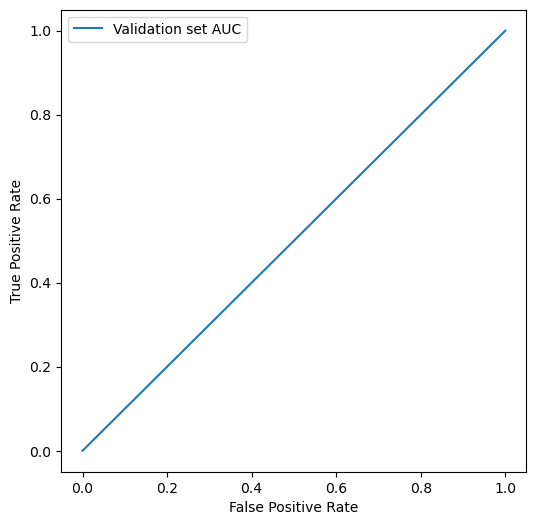

In [28]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model = linreg.fit(X_train,y_train)
model_evaluation(y_valid, results[0], results[1])

# Elbow Method for K-Means

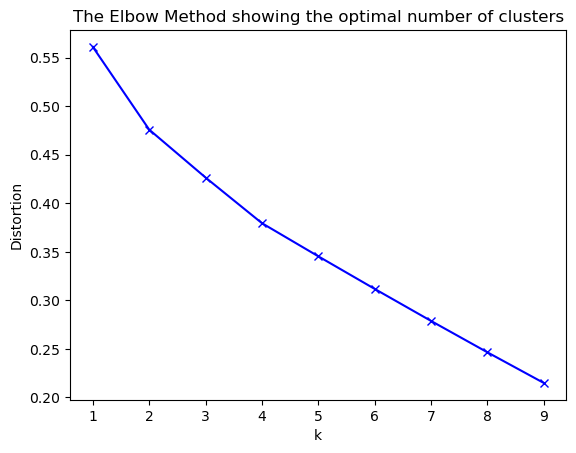

In [29]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tfidf_df)
    distortions.append(sum(np.min(cdist(tfidf_df, kmeanModel.cluster_centers_, 'euclidean'), \
                                  axis=1)) / tfidf_df.shape[0])


# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()

# K-Means

In [30]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(tfidf_df)
y_kmeans = kmeans.predict(tfidf_df)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

# LDA:

In [31]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 900)

sentences = pd.read_csv('dataset.csv', usecols=['cleaned_data'])


In [32]:
# Fill NaN Values
sentences.fillna('', inplace=True)

In [33]:
from gensim.parsing.preprocessing import preprocess_string
sentences = sentences.cleaned_data.apply(preprocess_string).tolist()

In [34]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

dictionary = corpora.Dictionary(sentences)
corpus = [dictionary.doc2bow(data) for data in sentences]

In [35]:
NUM_TOPICS = 10
ldamodel = LdaModel(corpus, 
                    num_topics = NUM_TOPICS, 
                    id2word=dictionary, passes=15)

In [36]:
ldamodel.print_topics(num_words=6)

[(0,
  '0.046*"film" + 0.022*"year" + 0.013*"movi" + 0.012*"star" + 0.011*"war" + 0.008*"horror"'),
 (1,
  '0.053*"film" + 0.032*"movi" + 0.021*"like" + 0.021*"charact" + 0.018*"scene" + 0.013*"effect"'),
 (2,
  '0.024*"perform" + 0.019*"cast" + 0.015*"charact" + 0.014*"write" + 0.014*"direct" + 0.013*"act"'),
 (3,
  '0.016*"plai" + 0.016*"life" + 0.012*"friend" + 0.011*"time" + 0.011*"want" + 0.010*"man"'),
 (4,
  '0.036*"love" + 0.014*"fall" + 0.010*"provid" + 0.010*"boi" + 0.010*"miss" + 0.009*"sens"'),
 (5,
  '0.020*"new" + 0.011*"ask" + 0.010*"portrai" + 0.009*"later" + 0.008*"year" + 0.008*"rate"'),
 (6,
  '0.008*"red" + 0.008*"killer" + 0.008*"tale" + 0.008*"face" + 0.008*"joe" + 0.008*"hand"'),
 (7,
  '0.023*"film" + 0.013*"charact" + 0.013*"scene" + 0.012*"music" + 0.011*"perfect" + 0.010*"especi"'),
 (8,
  '0.027*"film" + 0.025*"good" + 0.023*"movi" + 0.013*"like" + 0.013*"thing" + 0.012*"end"'),
 (9,
  '0.010*"black" + 0.009*"mother" + 0.009*"town" + 0.009*"life" + 0.008*"me

In [37]:
from gensim.models.coherencemodel import CoherenceModel

def calculate_coherence_score(documents, dictionary, model):
    coherence_model = CoherenceModel(model=model, 
                                     texts=documents, 
                                     dictionary=dictionary, 
                                     coherence='c_v')
    return coherence_model.get_coherence()

def get_coherence_values(start, stop):
    for num_topics in range(start, stop):
        print(f'\nCalculating coherence for {num_topics} topics')
        ldamodel = LdaModel(corpus, 
                    num_topics = num_topics, 
                    id2word=dictionary, passes=2)
        coherence = calculate_coherence_score(sentences, dictionary, ldamodel)
        yield coherence
        
min_topics, max_topics = 10,30
coherence_scores = list(get_coherence_values(min_topics, max_topics))


Calculating coherence for 10 topics

Calculating coherence for 11 topics

Calculating coherence for 12 topics

Calculating coherence for 13 topics

Calculating coherence for 14 topics

Calculating coherence for 15 topics

Calculating coherence for 16 topics

Calculating coherence for 17 topics

Calculating coherence for 18 topics

Calculating coherence for 19 topics

Calculating coherence for 20 topics

Calculating coherence for 21 topics

Calculating coherence for 22 topics

Calculating coherence for 23 topics

Calculating coherence for 24 topics

Calculating coherence for 25 topics

Calculating coherence for 26 topics

Calculating coherence for 27 topics

Calculating coherence for 28 topics

Calculating coherence for 29 topics


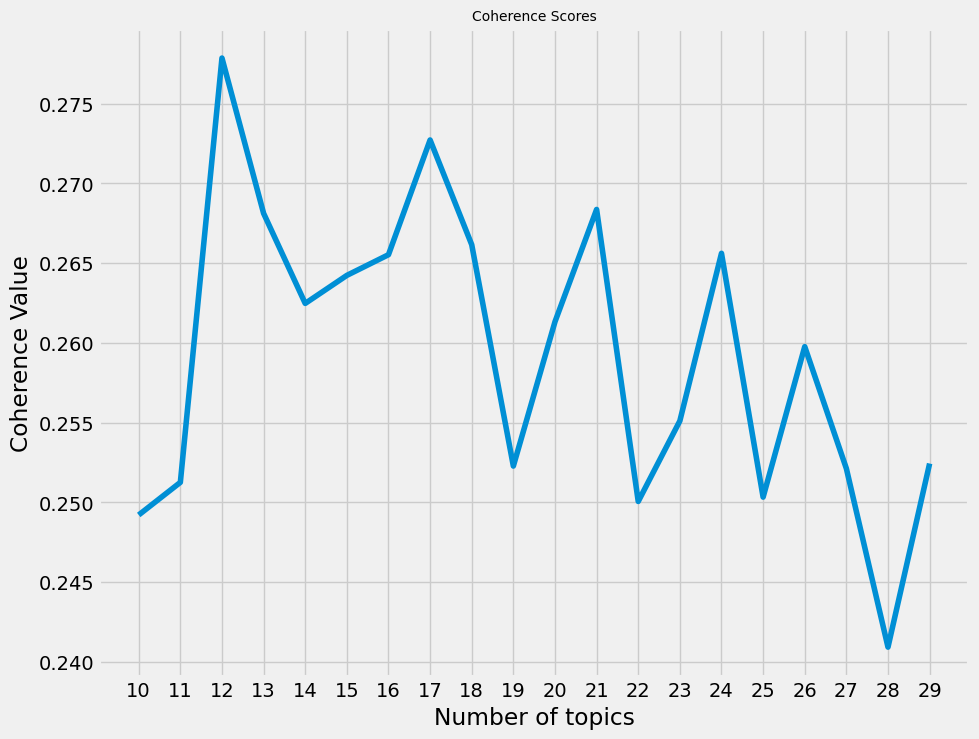

In [38]:
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.ticker import MaxNLocator

style.use('fivethirtyeight')

%matplotlib inline

x = [int(i) for i in range(min_topics, max_topics)]

ax = plt.figure(figsize=(10,8))
plt.xticks(x)
plt.plot(x, coherence_scores)
plt.xlabel('Number of topics')
plt.ylabel('Coherence Value')
plt.title('Coherence Scores', fontsize=10);

# Text Summarization

In [40]:
# TextRank
import zipfile

GLOVE_ZIP ='glove.6B.50d.zip'

zip_ref = zipfile.ZipFile(GLOVE_ZIP, 'r')
zip_ref.extractall()
zip_ref.close()

def load_glove_vectors(fn):
    print("Loading Glove Model")
    with open( fn,'r', encoding='utf8') as glove_vector_file:
        model = {}
        for line in glove_vector_file:
            parts = line.split()
            word = parts[0]
            embedding = np.array([float(val) for val in parts[1:]])
            model[word] = embedding
        print("Loaded {} words".format(len(model)))
    return model

glove_vectors = load_glove_vectors('glove.6B.50d.txt')


Loading Glove Model
Loaded 400000 words


In [41]:
tr = pd.DataFrame()
# Fill NaN Values
df.fillna('', inplace=True)

def clean(word):
    return re.sub(CLEAN_PATTERN, '', word)

def tokenize_words(sentences):
    return [word_tokenize(sentence) 
              for sentence in sentences]


tr['SentencesInArticle'] = df.cleaned_data.apply(sent_tokenize)
tr['WordsInSentences'] = tr.SentencesInArticle \
              .apply(tokenize_words)
tr['Polarity'] = df['Polarity(neg:0,pos:1)']

In [42]:
tr = tr[['SentencesInArticle', 'WordsInSentences', 'Polarity']]
VECTOR_SIZE = 50
EMPTY_VECTOR = np.zeros(VECTOR_SIZE)

def sentence_vector(sentence):
    ls = len(sentence)
    if len(sentence) == 0:
        ls=1
    else:
        return sum([glove_vectors.get(word, EMPTY_VECTOR) 
                  for word in sentence])/ls

def sentences_to_vectors(sentences):
    return [sentence_vector(sentence) 
              for sentence in sentences]
tr.head()

,SentencesInArticle,WordsInSentences,Polarity
0,[ bad bad],"[[bad, bad]]",0
1,[ bad],[[bad]],0
2,[ one word seem pretty much sum beyond valley doll],"[[one, word, seem, pretty, much, sum, beyond, valley, doll]]",0
3,[ summary n't enough],"[[summary, n't, enough]]",0
4,[ still n't get point],"[[still, n't, get, point]]",0


In [43]:
tr['SentenceVector'] = \
        tr.WordsInSentences.apply(sentences_to_vectors)

# Similarity Matrix

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

def similarity_matrix(sentence_vectors):
    sim_mat = np.zeros([len(sentence_vectors), len(sentence_vectors)])
    for i in range(len(sentence_vectors)):
        for j in range(len(sentence_vectors)):
            element_i = sentence_vectors[i].reshape(1,VECTOR_SIZE)
            element_j = sentence_vectors[j].reshape(1,VECTOR_SIZE)
            sim_mat[i][j] = cosine_similarity(element_i,
                                              element_j)[0,0]
    return sim_mat

In [45]:
tr['SimMatrix'] = tr.SentenceVector.apply(similarity_matrix)

In [46]:
import networkx as nx

def compute_graph(sim_matrix):
    nx_graph = nx.from_numpy_array(sim_matrix)
    scores = nx.pagerank(nx_graph)
    return scores

tr.head()

,SentencesInArticle,WordsInSentences,Polarity,SentenceVector,SimMatrix
0,[ bad bad],"[[bad, bad]]",0,"[[-0.17981, -0.40407, -0.1653, -0.60687, -0.39656, 0.12688, -0.053049, 0.38024, -0.51008, 0.46593, -0.30818, 0.79362, -0.85766, -0.25143, 1.0448, 0.18628, 0.13688, 0.092588, -0.2236, -0.13604, -0.19482, 0.057702, 0.56133, 0.24823, 0.627, -1.8437, -1.2573, 0.64482, 1.2787, -0.29522, 3.0493, 0.62079, 0.90369, -0.030099, -0.13091, 0.30525, -0.070138, -0.12912, 0.72277, -0.79774, -0.70277, 0.038009, 0.27192, 0.35679, 0.26493, 0.13037, -0.01369, 0.33713, 0.99956, 0.72031]]",[[0.9999999999999998]]
1,[ bad],[[bad]],0,"[[-0.17981, -0.40407, -0.1653, -0.60687, -0.39656, 0.12688, -0.053049, 0.38024, -0.51008, 0.46593, -0.30818, 0.79362, -0.85766, -0.25143, 1.0448, 0.18628, 0.13688, 0.092588, -0.2236, -0.13604, -0.19482, 0.057702, 0.56133, 0.24823, 0.627, -1.8437, -1.2573, 0.64482, 1.2787, -0.29522, 3.0493, 0.62079, 0.90369, -0.030099, -0.13091, 0.30525, -0.070138, -0.12912, 0.72277, -0.79774, -0.70277, 0.038009, 0.27192, 0.35679, 0.26493, 0.13037, -0.01369, 0.33713, 0.99956, 0.72031]]",[[0.9999999999999998]]
2,[ one word seem pretty much sum beyond valley doll],"[[one, word, seem, pretty, much, sum, beyond, valley, doll]]",0,"[[0.33188411111111116, 0.21910344444444446, -0.11404544444444441, -0.251971, 0.5308933333333333, 0.05269900000000002, -0.3637356666666666, -0.16180855555555557, -0.34914333333333336, 0.2396555555555556, -0.24270344444444447, 0.07188033333333334, 0.006159777777777774, -0.1732711111111111, 0.44149333333333335, 0.22509861111111112, 0.29144222222222216, 0.15382924444444443, -0.10915144444444445, -0.44584777777777784, -0.2590022222222223, -0.06104555555555555, 0.0858511111111111, 0.18248666666666663, 0.33635444444444446, -1.24591, -0.9891766666666667, 0.4849891111111111, 0.45961677777777776, -0.44740422222222226, 2.7507211111111114, -0.030776111111111115, 0.1447167777777778, -0.08087659999999997, 0.07538844444444444, -0.09059944444444444, -0.18811755555555554, 0.11839877777777781, 0.057809777777777765, -0.4117697777777778, -0.2014288888888889, 0.06405355555555554, -0.14843277777777777, 0....",[[0.9999999999999999]]
3,[ summary n't enough],"[[summary, n't, enough]]",0,"[[0.067754, -0.148093, 0.06202333333333334, 0.030623333333333298, 0.48083666666666663, -0.5130656666666666, -0.07894999999999999, 0.24634433333333336, -0.135394, 0.1318566666666667, -0.5003033333333333, 0.19810333333333333, -0.23342066666666664, 0.027364, 1.1777, 0.16905, 0.10821666666666663, -0.5914036666666667, -0.31777266666666665, -0.9029699999999999, 0.045470000000000003, 0.20141633333333334, 0.7508633333333333, -0.003946666666666672, 0.37790366666666664, -1.3149499999999998, -0.5026700000000001, 0.0037400000000000024, 0.7992033333333334, -0.19255000000000003, 2.9475000000000002, 0.14828000000000005, -0.5012566666666667, -0.5361600000000001, -0.025903333333333334, -0.11589333333333333, 0.16627666666666666, 0.18629333333333334, 0.09281666666666667, -0.5397515333333334, -0.08214133333333334, -0.011280000000000004, 0.468891, 0.5717833333333333, -0.05389666666666668, 0.4242776666666...",[[0.9999999999999998]]
4,[ still n't get point],"[[still, n't, get, point]]",0,"[[0.12637299999999999, 0.017558249999999997, 0.34532, -0.3212585, 0.5342775, -0.11506199999999998, -0.7417474999999999, 0.283585, -0.34218299999999996, 0.09925575, -0.173704, 0.1849575, -0.5060175, -0.15311825, 0.726025, 0.5322475, 0.432605, -0.2645314, -0.275957, -0.8584575, -0.406165, 0.306475, 0.270335, 0.100163725, 0.508865, -1.9616750000000003, -0.3312225, 0.3550125, 0.78184, -0.7800340000000001, 3.509475, 0.5680150000000002, -0.20285250000000002, -0.2189275, 0.11772475, -0.3200075, -0.002815000000000005, 0.26427500000000004, 0.29266575, -0.5399375, -0.32259899999999997, 0.09486800000000001, 0.16039675, 0.593935, -0.04769175, -0.05841174999999999, 0.08228325000000003, 0.006526750000000001, -0.07244500000000002, 0.32515583899999995]]",[[0.9999999999999999]]


In [47]:
tr['Graph'] = tr.SimMatrix.apply(compute_graph)

In [48]:
tr.head(2)

,SentencesInArticle,WordsInSentences,Polarity,SentenceVector,SimMatrix,Graph
0,[ bad bad],"[[bad, bad]]",0,"[[-0.17981, -0.40407, -0.1653, -0.60687, -0.39656, 0.12688, -0.053049, 0.38024, -0.51008, 0.46593, -0.30818, 0.79362, -0.85766, -0.25143, 1.0448, 0.18628, 0.13688, 0.092588, -0.2236, -0.13604, -0.19482, 0.057702, 0.56133, 0.24823, 0.627, -1.8437, -1.2573, 0.64482, 1.2787, -0.29522, 3.0493, 0.62079, 0.90369, -0.030099, -0.13091, 0.30525, -0.070138, -0.12912, 0.72277, -0.79774, -0.70277, 0.038009, 0.27192, 0.35679, 0.26493, 0.13037, -0.01369, 0.33713, 0.99956, 0.72031]]",[[0.9999999999999998]],{0: 1.0}
1,[ bad],[[bad]],0,"[[-0.17981, -0.40407, -0.1653, -0.60687, -0.39656, 0.12688, -0.053049, 0.38024, -0.51008, 0.46593, -0.30818, 0.79362, -0.85766, -0.25143, 1.0448, 0.18628, 0.13688, 0.092588, -0.2236, -0.13604, -0.19482, 0.057702, 0.56133, 0.24823, 0.627, -1.8437, -1.2573, 0.64482, 1.2787, -0.29522, 3.0493, 0.62079, 0.90369, -0.030099, -0.13091, 0.30525, -0.070138, -0.12912, 0.72277, -0.79774, -0.70277, 0.038009, 0.27192, 0.35679, 0.26493, 0.13037, -0.01369, 0.33713, 0.99956, 0.72031]]",[[0.9999999999999998]],{0: 1.0}


# Ranked Sentences

In [49]:
def get_ranked_sentences(sentences, scores, n=3):
    top_scores = sorted(((scores[i],s) 
                         for i,s in enumerate(sentences)), 
                                reverse=True)
    top_n_sentences = [sentence 
                        for score,sentence in top_scores[:n]]
    return " ".join(top_n_sentences)

tr['Summary'] = tr.apply(lambda d: get_ranked_sentences(d.SentencesInArticle, d.Graph), axis=1)

# Summary

In [50]:
tr.loc[0].Summary

' bad bad'

In [51]:
tr.loc[1].Summary

' bad'

In [52]:
def writeTxt(path, sentence):
    with open(path, 'a') as output:
        output.write(sentence)
        
for i in range(len(tr)):
    if tr['Polarity'][i] == 1:
        writeTxt('pos_summarized.txt',str(tr.loc[0].Summary))
    else:
        writeTxt('neg_summarized.txt',str(tr.loc[1].Summary))
  